<a href="https://colab.research.google.com/github/jcalbertin/mba/blob/master/Trabalho_n%C3%A3o_supervisionado_mba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Aprendizado não-supervisionado
Aluno: José Carlos Albertin

## Introdução ao Aprendizado Não Supervisionado
    A aprendizagem de máquina não-supervisionada objetiva encontrar padrões e relações em um conjunto de dados.
    
### K-means
    
  >  O algoritmo k-means procura um número predeterminado de clusters dentro de um conjunto de dados multidimensional não rotulado. Isso é feito usando uma concepção de como é o clustering ideal:
  - O centro do cluster (centroid) é a média aritmética de todos os pontos pertencentes ao cluster.
  - Cada ponto está mais próximo de seu próprio centro de cluster do que de outros centros de cluster.
  
 > O algoritmo re-calcula os centros do cluster até que os mesmos não se alterem mais, finalizando o processo.


### Gaussian Mixture Models

> É um modelo de mistura gaussiana (GMM) O GMM é um modelo para apresentar subpopulações normalmente distribuídas dentro de uma população total. GMM tenta encontrar uma mistura de distribuições de probabilidade gaussianas multidimensionais que melhor modelem qualquer conjunto de dados de entrada, permitindo analisar conjunto de dados alongados, um dos problemas do método K-means.

    
### Spectral

> Objetiva identificar grupos de comportamento similar em conjunto de dados. Esse algoritmo usa a proximidade entre os pontos de dados para agrupá-los, tornando possível evitar o agrupamento de formas esféricas que o algoritmo K-means assume, de tal forma que seja possível formar um grafo em que alguns pontos formam arestas entre eles.

> Os 3 passos desse métdodo são: 
1. construção de um gráfico de vizinhos mais próximo (gráfico KNN) ou gráfico baseado em raio. 
2. Incorporar os pontos de dados no espaço dimensional baixo (incorporação espectral) em que os clusters são mais evidentes com o uso de autovetores do gráfico Laplaciano. 
3. Use o menor valor para escolher o autovetor para o cluster.


### Hierárquico

> a


## Desenvolvimento dos modelos

In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
%matplotlib inline

In [0]:
#importa o modelo
iris = datasets.load_iris()

In [0]:
iris.data
iris.feature_names
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:

x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Text(0.5, 1.0, 'Petal')

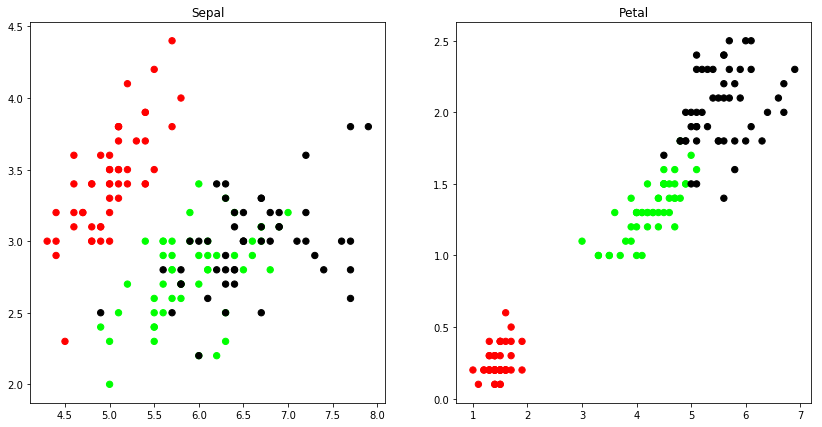

In [0]:

plt.figure(figsize=(14,7))
 

colormap = np.array(['red', 'lime', 'black'])
 

plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

### a) K-means

In [0]:
# K Means 
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicao')

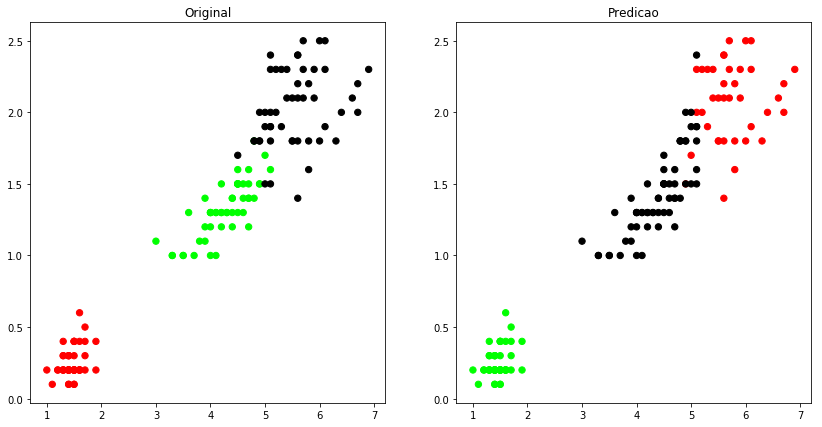

In [0]:

plt.figure(figsize=(14,7))
 

colormap = np.array(['red', 'lime', 'black'])
 

plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Original')
 

plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('Predicao')

In [0]:
model.labels_
#y.Targets

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [0]:
# Faz a equivalencia dos valores (target) do real para a predicao
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int32)
print (model.labels_)
print (predY)
type(predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


numpy.ndarray

Text(0.5, 1.0, 'Predicao com equivalencia')

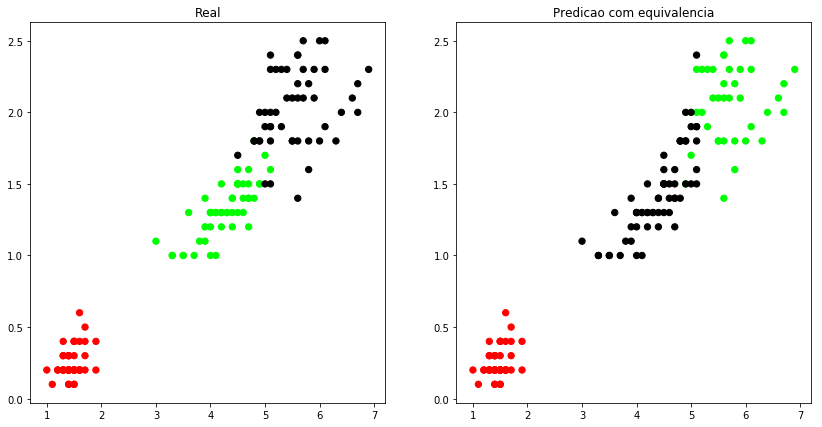

In [0]:
# Visualizando resultados
plt.figure(figsize=(14,7))
 
# Definindo cores
colormap = np.array(['red', 'lime', 'black'])
 
# Original
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')
 
# Predicao com valores corretos
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predY], s=40)
plt.title('Predicao com equivalencia')

In [0]:
#verificando acurácia do modelo
sm.accuracy_score(y, predY)


0.44

In [0]:
# Gerando matriz de confusão
sm.confusion_matrix(y, predY)

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

#### Resultados - K-means:

- Classe 0 - todos identificados de maneira correta
- Classe 1 - classificado 48 corretos porem 2 incorretos (classe 1 como classe 2)
- Classe 2 - classificado 36 (classe 2), porem 14 classes 2 ( como classe 1)

###  b) Gaussian Mixture Models

In [0]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(x)
labels_gmm = gmm.predict(x)

In [0]:
labels_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
predYg = np.choose(labels_gmm, [0,1, 2]).astype(np.int32)
probs = gmm.predict_proba(x)
print(probs[:5].round(3))
print(predYg)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Text(0.5, 1.0, 'Predicao com equivalencia')

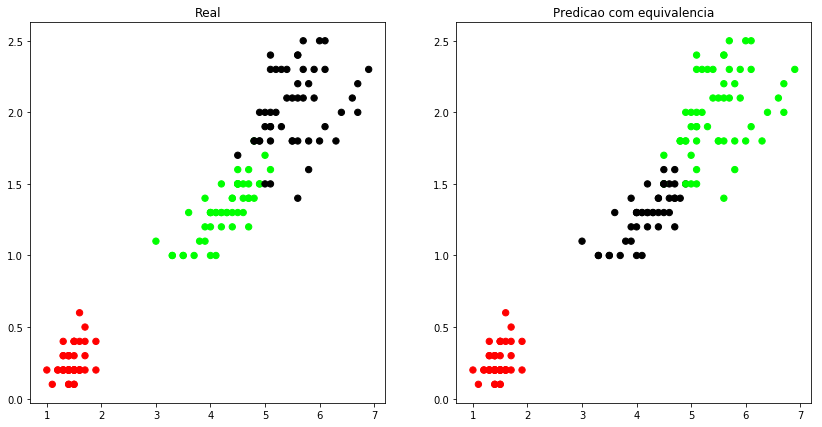

In [0]:
# Visualizando resultados
plt.figure(figsize=(14,7))
 
# Definindo cores
colormap = np.array(['red', 'lime', 'black', 'blue'])
 
# Original
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')
 
# Predicao com valores gmm
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predYg], s=40)
plt.title('Predicao com equivalencia')

In [0]:
sm.confusion_matrix(y, predYg)

array([[50,  0,  0],
       [ 0,  5, 45],
       [ 0, 50,  0]])

#### Resultados - Gaussian:

- Classe 0 - todos identificados de maneira correta
- Classe 1 - 45 corretos e 5 classificados erroneamente
- Classe 2 - todos identificados de maneira correta

### c) Spectral

In [0]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=4, affinity="rbf")
spectral.fit(x)
clusters = model.labels_

In [0]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [0]:
predYspectral = np.choose(clusters, [0,1, 2]).astype(np.int32)
#probs = spectral.predict_proba(x
print(predYspectral)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 1.0, 'Predicao com equivalencia spectral')

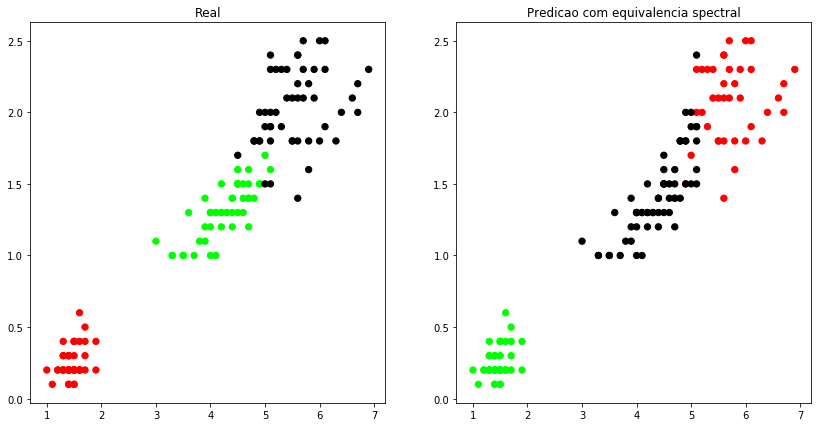

In [0]:
# Visualizando resultados
plt.figure(figsize=(14,7))
 
# Definindo cores
colormap = np.array(['red', 'lime', 'black'])
 
# Original
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')
 
# Predicao com valores gmm
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predYspectral], s=40)
plt.title('Predicao com equivalencia spectral')

In [0]:
sm.confusion_matrix(y, predYspectral)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

#### Resultados - Spectral:

- Classe 0 - todos identificados corretamente 
- Classe 1 - 48 corretos e 2 incorretos
- Classe 2 - 36 corretos e 14 incorretos

### d) Hierárquico

In [0]:
from sklearn.cluster import AgglomerativeClustering
hierarquico = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
labels = model.fit(x).labels_


In [0]:
predicaoYHierarquico = np.choose(labels, [0,1, 2]).astype(np.int32)
print(predicaoYHierarquico)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 1.0, 'Predicao com equivalencia hierarquico')

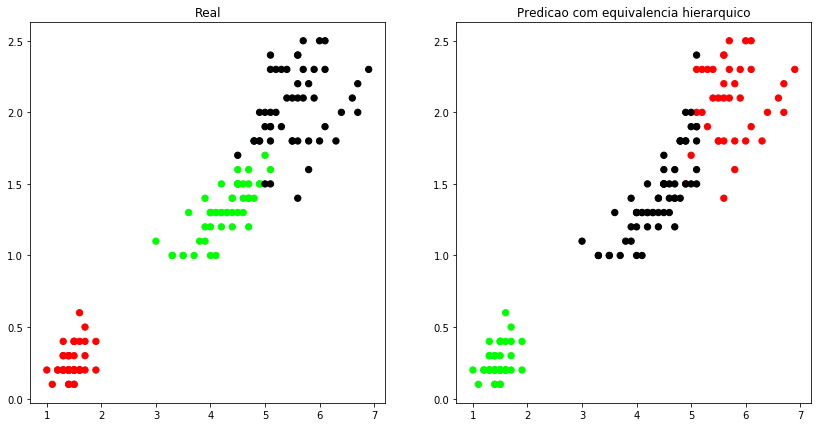

In [0]:
# Visualizando resultados
plt.figure(figsize=(14,7))
 
# Definindo cores
colormap = np.array(['red', 'lime', 'black'])
 
# Original
plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')
 
# Predicao com valores gmm
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[predicaoYHierarquico], s=40)
plt.title('Predicao com equivalencia hierarquico')

In [0]:
sm.confusion_matrix(y, predicaoYHierarquico)

array([[ 0, 50,  0],
       [ 2,  0, 48],
       [36,  0, 14]])

#### Resultados - Hierárquico: 

- Classe 1 - todos identificados de maneira correta
- Classe 0 - classificado 36 corretos porem 14 incorretos (classe 0 como classe 2)
- Classe 2 - classificado 48 (classe 2), porem 2 incorretos ( como classe 0)

## Conclusões

Conforme resultado apresentado, o melhor modelo foi o Gaussian Mixture Models, conforme apresentado nos resultados:


- Classe 0 - todos identificados de maneira correta
- Classe 1 - todos identificados
- Classe 2 - 45 corretos e 5 classificados erroneamente